<a href="https://colab.research.google.com/github/minonai/Experimental-data/blob/main/NondesMesure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

with open('Experimental-data.csv','r',encoding='utf-8') as f:
    reader = csv.reader(f)
    rawdata = list(reader)
"""
    for i in range(len(data)):
        print(data[i])
"""
data = np.array(rawdata[1:])

x_data = np.array([])
lambda_data = np.array([])

x_ev = np.array([])
lambda_ev = np.array([])

print(np.shape(data))
print(data)

for i, lines in enumerate(data):
    if i % 10 == 0:
         x_ev=np.append(x_ev, data[i,2:])
         lambda_ev = np.append(lambda_ev, data[i,1])
    else:
        x_data=np.append(x_data, data[i,2:])
        lambda_data = np.append(lambda_data, data[i,1])

print(x_data)
print(x_ev)


x_data = x_data.reshape(91,233)
x_data = np.asarray(x_data, dtype=float)
lambda_data = np.asarray(lambda_data, dtype=float)
print(x_data)

x_ev = x_ev.reshape(11,233)
x_ev = np.asarray(x_ev, dtype=float)
lambda_ev = np.asarray(lambda_ev, dtype=float)
print(np.shape(lambda_data))

(102, 235)
[['A1' '8.7987900889288' '0.124147' ... '0.794368' '0.807111' '0.805687']
 ['A2' '8.7892235083058' '0.128288' ... '0.809223' '0.818145' '0.812576']
 ['A3' '8.0033846708525' '0.133973' ... '0.743639' '0.757739' '0.753404']
 ...
 ['C35' '4.1284118213821' '0.17333' ... '0.950999' '0.962067' '0.953931']
 ['C36' '4.6779980495481' '0.167616' ... '0.954479' '0.970852' '0.962185']
 ['C37' '4.5353749669932' '0.153521' ... '0.942779' '0.954034' '0.941459']]
['0.128288' '0.120047' '0.1162' ... '0.942779' '0.954034' '0.941459']
['0.124147' '0.118859' '0.113842' ... '0.954479' '0.970852' '0.962185']
[[0.128288 0.120047 0.1162   ... 0.809223 0.818145 0.812576]
 [0.133973 0.129017 0.119903 ... 0.743639 0.757739 0.753404]
 [0.129774 0.122614 0.118735 ... 0.741849 0.753947 0.751743]
 ...
 [0.162505 0.154844 0.144167 ... 0.937889 0.947569 0.934694]
 [0.17333  0.164831 0.15577  ... 0.950999 0.962067 0.953931]
 [0.153521 0.1447   0.135884 ... 0.942779 0.954034 0.941459]]
(91,)


In [51]:
import matplotlib.pyplot as plt, numpy as np, math

def kernel_func(x1, x2):
    gamma = 1/2
    k = math.exp(-gamma * np.sum(np.subtract(x1, x2)**2))
    return k

def kernel_matrix(x1, x2):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            K[i, j] = kernel_func(x1[i], x2[j])
    return K

#optimal solution
K = kernel_matrix(x_data, x_data)
c = np.linalg.inv(K) @ lambda_data

print(K)
print(c)

[[1.         0.82674457 0.86199112 ... 0.39086896 0.32537096 0.2838021 ]
 [0.82674457 1.         0.99481965 ... 0.14131013 0.10919721 0.08980961]
 [0.86199112 0.99481965 1.         ... 0.16476382 0.12872383 0.1069091 ]
 ...
 [0.39086896 0.14131013 0.16476382 ... 1.         0.99136903 0.97163731]
 [0.32537096 0.10919721 0.12872383 ... 0.99136903 1.         0.98833057]
 [0.2838021  0.08980961 0.1069091  ... 0.97163731 0.98833057 1.        ]]
[ -1580.41429951  -6052.05580091 -21625.50649081   8858.56110092
  11103.05273425 -49044.80592424  18493.91873733   6914.33517419
   -239.18697397  20231.18406528  10664.88952247  35730.38922804
  51009.78586079 -34900.57813781 -47348.14670905  20863.93074388
 -37525.96660727 -31638.26407071   7380.12921798  34896.2126164
  -9466.04734168  -8550.70794787 -27403.4126826   55167.64151605
 -23236.57764661   1904.40402941  11884.5383937    7043.05648079
 -27190.40892556  10993.19801373   5125.15773087  11547.96707795
   5208.18023661  -8106.73904852  295

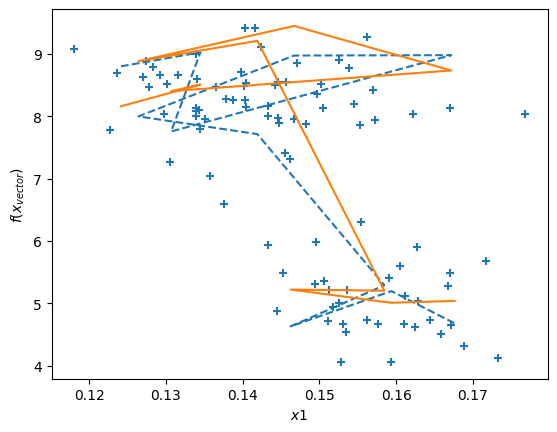

1.107975481239726e-17


In [61]:
k_s = kernel_matrix(x_ev, x_data)
lambda_sol = k_s @ c

fig, ax = plt.subplots()
ax.plot(x_ev[:,0], lambda_ev, ls = "--")
ax.plot(x_ev[:,0], lambda_sol)
ax.scatter(x_data[:,0], lambda_data, marker='+')
plt.xlabel('$x1$'), plt.ylabel('$f(x_{vector})$')
plt.show()

L = np.linalg.norm(K @ c - lambda_data)**2
print(L)